In [1]:
import openslide
import numpy as np
import cv2
from PIL import Image
import json
import os
from tqdm import tqdm

In [2]:
patients = np.load('pidlist.npy',allow_pickle=True)

In [5]:
ORIPATH = '/data/images/pathology/temp/Qingdao'
path = ORIPATH+ '/'+ '201605479-1'+'/'+'201605479-1.mrxs'

In [4]:
slide = openslide.OpenSlide(path)

In [5]:
slide.level_count

10

In [10]:
slide.level_dimensions[]

(501, 1117)

In [5]:
slide.level_dimensions[4]
tissue_mask = slide.read_region((0, 0), 6, slide.level_dimensions[6])
tissue_mask = cv2.cvtColor(np.array(tissue_mask), cv2.COLOR_RGBA2RGB)

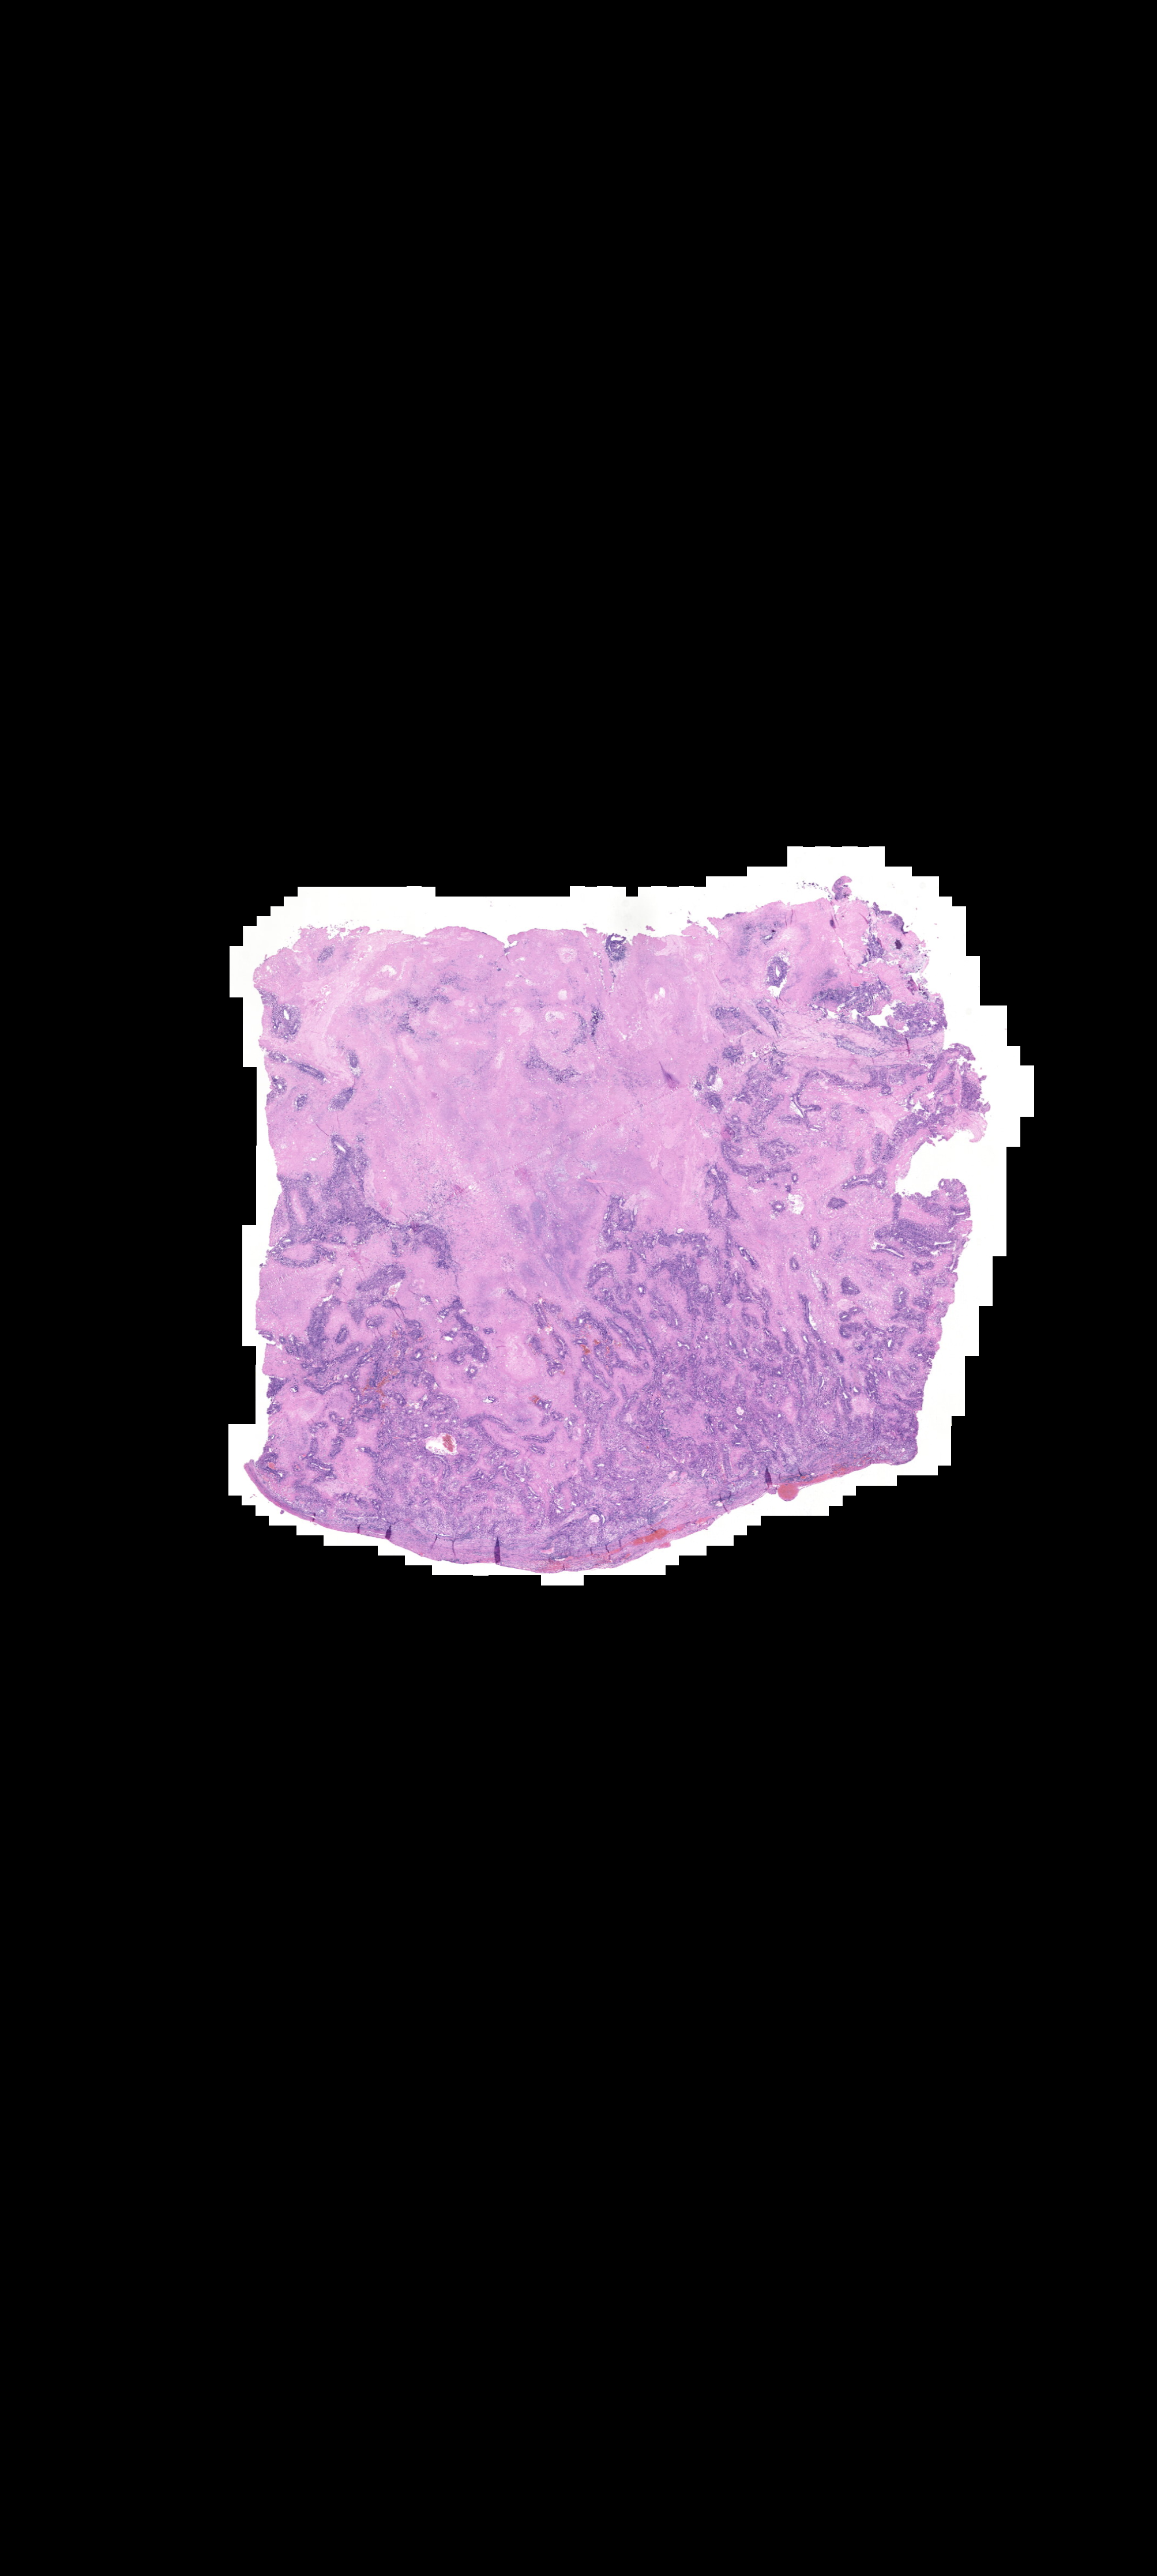

In [6]:
img = Image.fromarray(tissue_mask)
img

In [2]:
zipdir = 'zipimgsse'
if not os.path.exists(zipdir):
    os.makedirs(zipdir)

In [9]:
img.save('zipimgs/201605479-1.jpg')

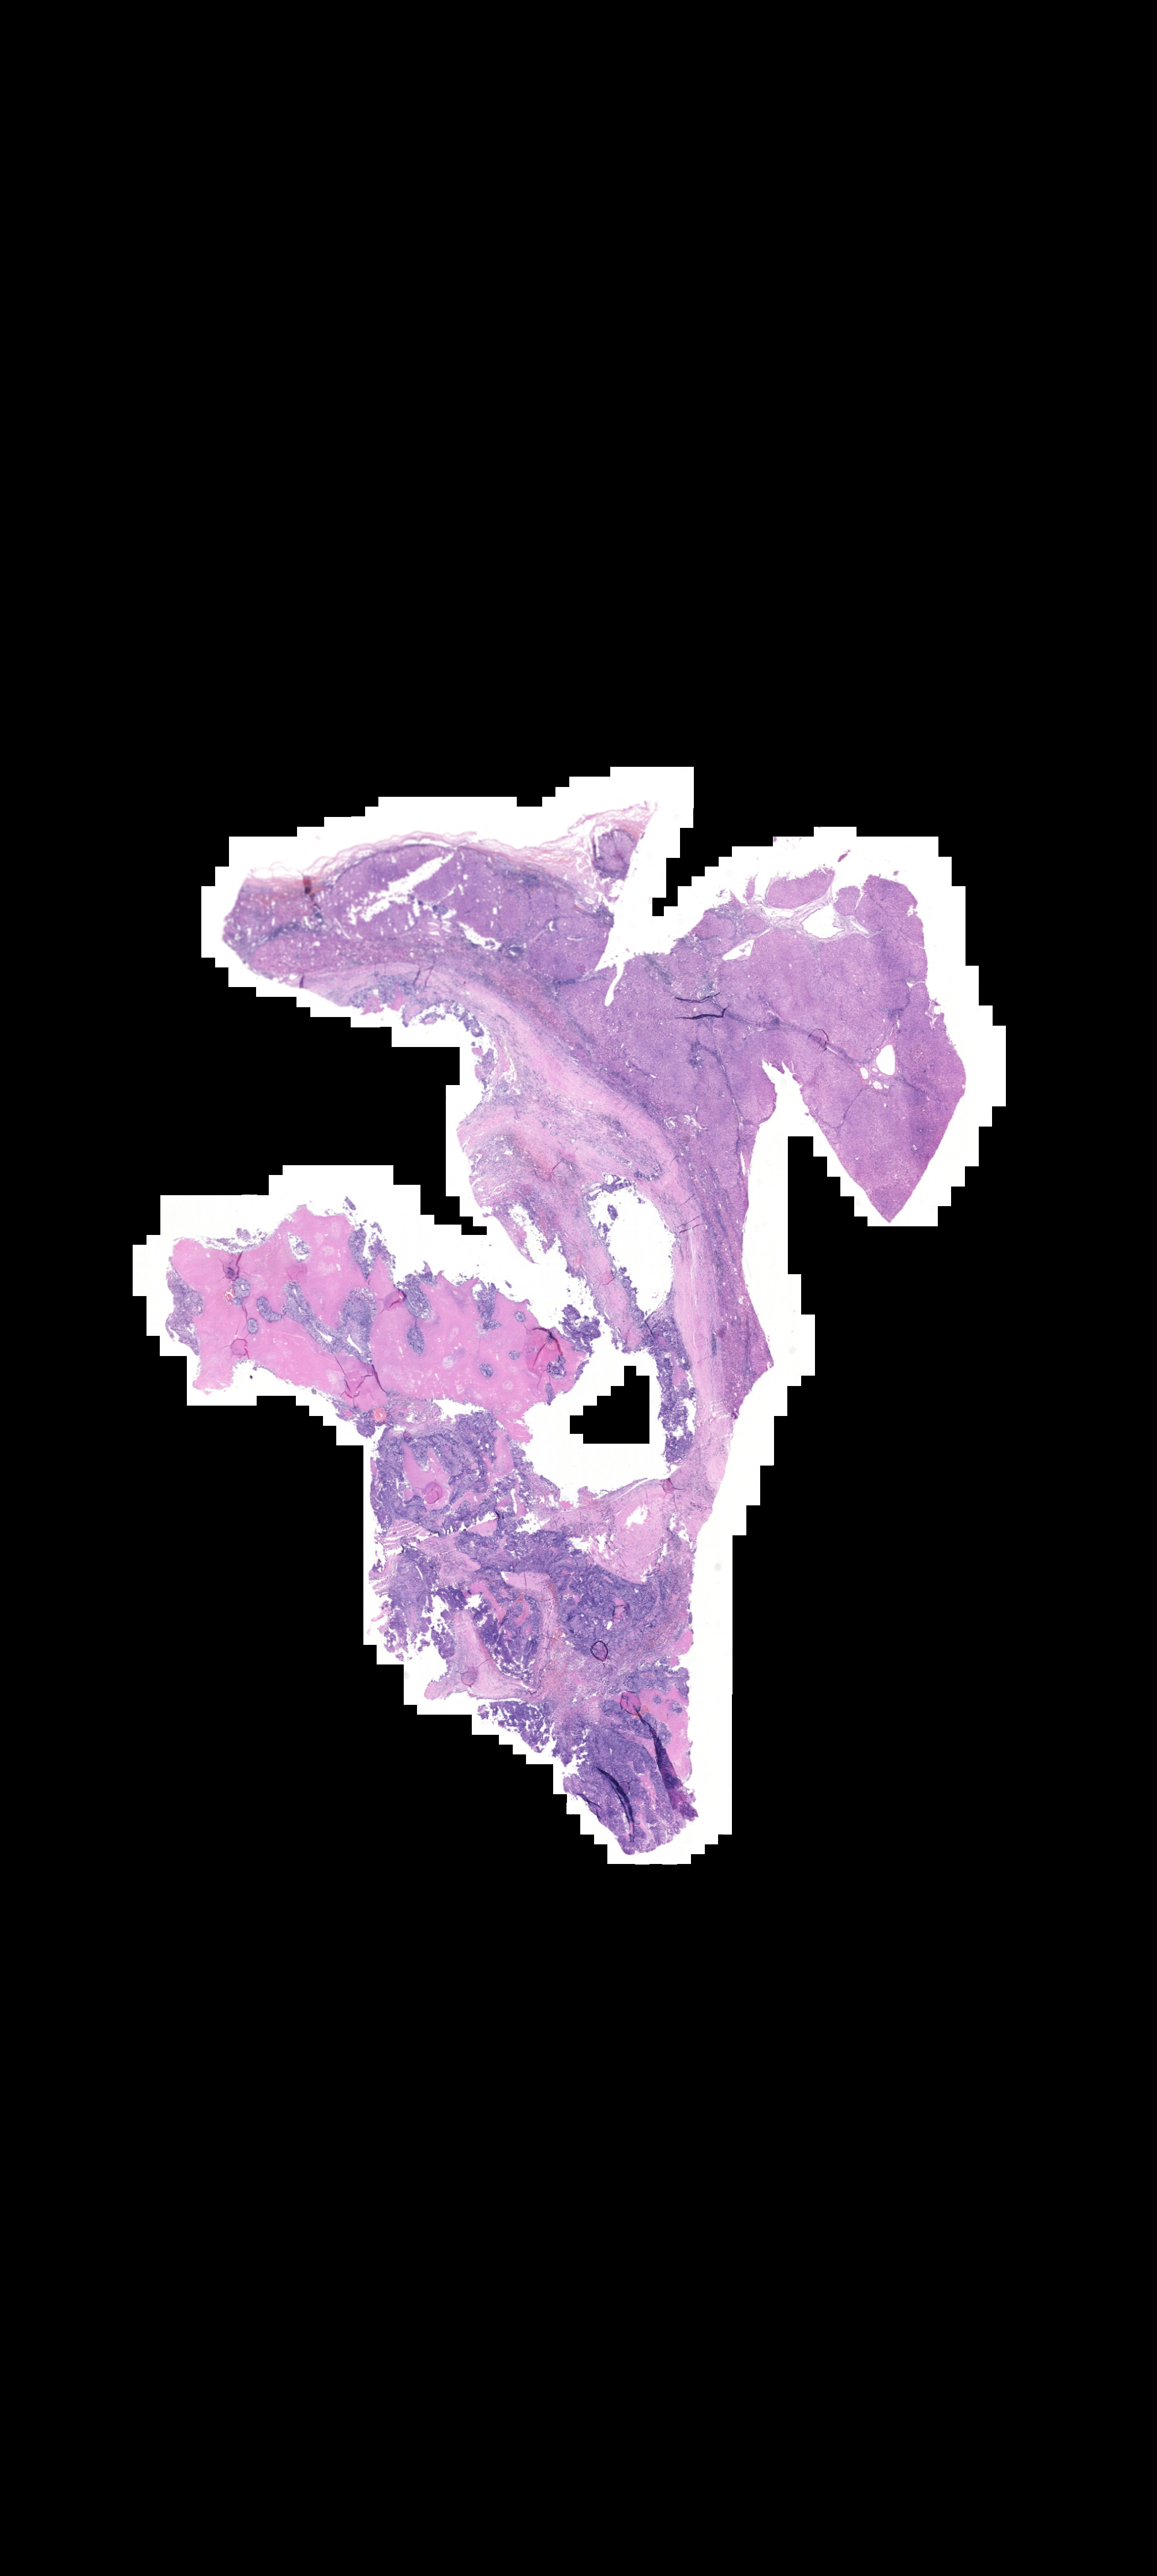

In [26]:
path1 = ORIPATH+ '/'+ '201605479-2'+'/'+'201605479-2.mrxs'
slide = openslide.OpenSlide(path1)
slide.level_dimensions[4]
tissue_mask = slide.read_region((0, 0), 6, slide.level_dimensions[6])
tissue_mask = cv2.cvtColor(np.array(tissue_mask), cv2.COLOR_RGBA2RGB)
img = Image.fromarray(tissue_mask)
img

In [28]:
fpath = 'plist.json'
with open(fpath,'r') as f:
    p = json.load(f)
len(p)

33

In [29]:
lack = np.load('lacklist.npy')

In [32]:
np.savetxt('lacklist.txt',lack,fmt = '%s')

In [6]:
spathlist = np.load('slist.npy')
len(spathlist)

233

In [3]:
np.load('slistse.npy')

array(['17-043414-3', '17-043414-4', '201630452-2', '17-046476-3',
       '17-046476-4', '201629755-2', '17-046476-1', '17-043414-2',
       '201630452-4', '201629755-3', '17-043414-1', '17-046476-2',
       '201629755-4', '201630452-3'], dtype='<U11')

In [6]:
# generate zip images
spathlist = np.load('testslide2.npy',allow_pickle=True)
for spath in tqdm(spathlist):
    sdir = os.path.join(ORIPATH,spath,spath+'.mrxs')
    slide = openslide.OpenSlide(sdir)
    tissue_mask = slide.read_region((0, 0), 6, slide.level_dimensions[6])
    tissue_mask = cv2.cvtColor(np.array(tissue_mask), cv2.COLOR_RGBA2RGB)
    img = Image.fromarray(tissue_mask)
    img.save(os.path.join(zipdir,spath+'.jpg'))

100%|██████████| 30/30 [00:31<00:00,  1.04s/it]


In [21]:
with open('plist.json','r') as f:
    data = json.load(f)
data.keys()

dict_keys(['201530023', '201600623', '201600666', '201600885', '201601564', '201601684', '201601986', '201602454', '201602683', '201603238', '201603916', '201604045', '201604335', '201605479', '201608537', '201609207', '201609810', '201610196', '201612290', '201612916', '201613035', '201613577', '201614105', '201614266', '201624304', '201624650', '17-034786', '17-043414', '17-044123', '17-046476', '201409699', '201425959', '201431616'])

In [22]:
for path in tqdm(data):
    print(path)

100%|██████████| 33/33 [00:00<00:00, 25378.08it/s]

201530023
201600623
201600666
201600885
201601564
201601684
201601986
201602454
201602683
201603238
201603916
201604045
201604335
201605479
201608537
201609207
201609810
201610196
201612290
201612916
201613035
201613577
201614105
201614266
201624304
201624650
17-034786
17-043414
17-044123
17-046476
201409699
201425959
201431616


In [9]:
path = 'masktest'
#os.makedirs(path)
for slide in tqdm(spathlist):
    maskpath = os.path.join('patchdata',slide,'mask.npy')
    mask = np.load(maskpath)
    
    np.save(path+'/'+slide + '_'+'mask.npy',mask)

100%|██████████| 30/30 [00:13<00:00,  2.18it/s]
